



*   Listings, including full descriptions and average review score
*   Reviews, including unique id for each reviewer and detailed comments
*   Calendar, including listing id and the price and availability for that day





In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [ ]:
#view all data
#pd.set_option('display.max_rows', None)

In [ ]:
# Read the CSV file into a DataFrame
calendar = pd.read_csv('/content/calendar.csv')

# Display the first few rows of the DataFrame
calendar


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [ ]:
listings = pd.read_csv('/content/listings.csv')
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [ ]:
reviews = pd.read_csv('/content/reviews.csv')
reviews.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Understand data

#### Understanding calenders data set

Calendar, including listing id and the price and availability for that day

In [ ]:
def data_overview(data):
    print('data shape')
    print(data.shape)

    print('data description')
    print(data.describe())

    print('data null ratio')
    print(data.isnull().sum() / data.shape[0])

    print('data histogram')
    data.hist()
    plt.show()

    print('column name')
    print(data.columns)

    print('data categorical variables')
    for column in data.columns:
        if data[column].dtype == 'object':  # Check if the column is categorical
            print(data[column].value_counts())


data shape
(1393570, 4)
data description
         listing_id
count  1.393570e+06
mean   5.550111e+06
std    2.962274e+06
min    3.335000e+03
25%    3.258213e+06
50%    6.118244e+06
75%    8.035212e+06
max    1.034016e+07
data null ratio
listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64
data histogram


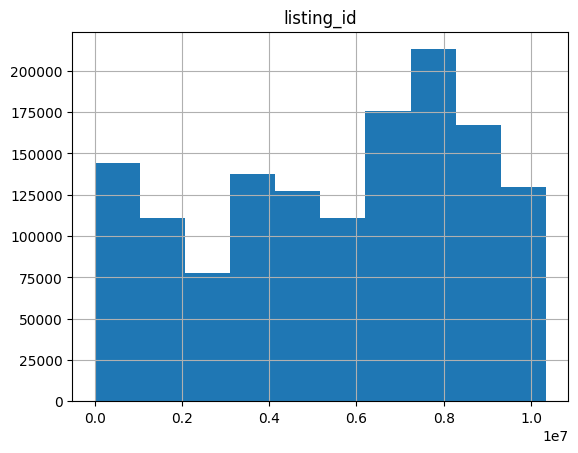

column name
Index(['listing_id', 'date', 'available', 'price'], dtype='object')
data categorical variables
2016-01-04    3818
2016-09-11    3818
2016-09-09    3818
2016-09-08    3818
2016-09-07    3818
              ... 
2016-05-03    3818
2016-05-02    3818
2016-05-01    3818
2016-04-30    3818
2017-01-02    3818
Name: date, Length: 365, dtype: int64
t    934542
f    459028
Name: available, dtype: int64
$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
           ...  
$751.00        1
$759.00        1
$12.00         1
$685.00        1
$554.00        1
Name: price, Length: 669, dtype: int64


In [ ]:
data_overview(calendar)

In [ ]:
calendar['listing_id'].nunique()

3818

#### Understand reviews dataset

data shape
(84849, 6)
data description
         listing_id            id   reviewer_id
count  8.484900e+04  8.484900e+04  8.484900e+04
mean   3.005067e+06  3.058765e+07  1.701301e+07
std    2.472877e+06  1.636613e+07  1.353704e+07
min    4.291000e+03  3.721000e+03  1.500000e+01
25%    7.946330e+05  1.725127e+07  5.053141e+06
50%    2.488228e+06  3.228809e+07  1.413476e+07
75%    4.694479e+06  4.457648e+07  2.762402e+07
max    1.024814e+07  5.873651e+07  5.281274e+07
data null ratio
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64
data histogram


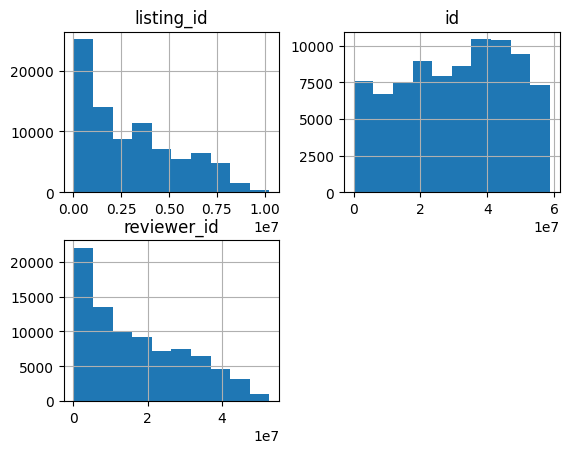

column name
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
data categorical variables
2015-09-21    580
2015-08-07    400
2015-09-07    384
2015-08-10    383
2015-08-31    371
             ... 
2010-11-30      1
2011-02-08      1
2011-03-15      1
2011-01-21      1
2012-01-07      1
Name: date, Length: 1930, dtype: int64
David        870
Michael      822
Sarah        681
John         608
Chris        570
            ... 
Noraleigh      1
Hesham         1
Oy             1
Peri           1
Jørgen         1
Name: reviewer_name, Length: 14380, dtype: int64
The host canceled this reservation the day before arrival. This is an automated posting.                                                                                                                                                                                                                                                                                                                

In [ ]:
data_overview(reviews)

In [ ]:
reviews['listing_id'].nunique()

3191

In [ ]:
reviews['reviewer_id'].nunique()

75730

#### Understand listings data set

data shape
(3818, 92)
data description
                 id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min     

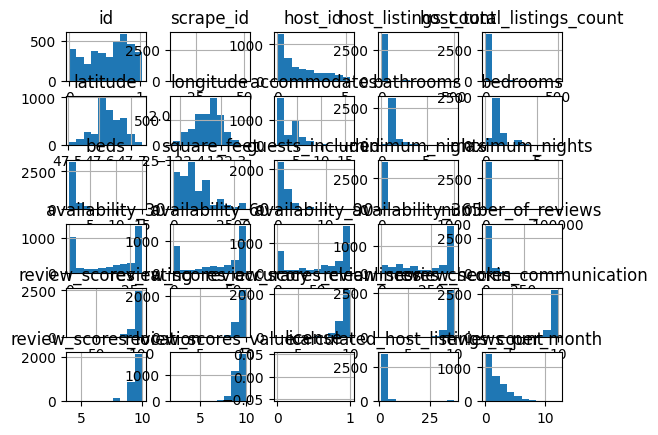

column name
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'a

In [ ]:
data_overview(listings)

### Questions

1. Listings:Are certain property types more common in specific neighborhoods?
Investigate the relationship between listing attributes (e.g., number of bedrooms, amenities) and average review scores. Are there certain features that tend to receive higher ratings? Do listings with more responsive hosts tend to have higher occupancy rates or better reviews?


2. What are the most frequent words used in reviews? Are there any patterns or trends in review sentiment over time? Identify any common themes or topics in the reviews (e.g., cleanliness, location, amenities)? Is there any correlation between review scores and listing characteristics (e.g., price, location, property type)? Explore the relationship between review scores and other factors such as listing price, location, or amenities. Are there any correlations or patterns that could help identify areas for improvement?


3. How does the price of listings vary based on factors like location, property type, and number of bedrooms/bathrooms? Are there any seasonal trends in pricing? Can you identify any outliers or anomalies in pricing?

4. Are there any patterns in host behavior (e.g., response rate, acceptance rate) that correlate with listing performance?

5. Predict the price of a listing based on its attributes (e.g., location, property type, number of bedrooms)?

### Prepare data

Calendar:
- transform price into numeric values
- how to deal with missing data (price)
- date range of the data
-


Review:
- commnents is null
- data range


Listings:
- missing score rating


##### Preparing listing data

In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [ ]:
listing_columns = ['id', 'property_type', 'room_type', 'description','neighbourhood_group_cleansed','neighbourhood_cleansed','accommodates','cleaning_fee', 'bathrooms', 'neighborhood_overview',
                   'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
                   'review_scores_rating', 'price', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
                   'review_scores_location','review_scores_value','summary', 'last_review', 'latitude','longitude']
listing_explore = listings[listing_columns]

In [ ]:
listing_explore

,id,property_type,room_type,description,neighbourhood_group_cleansed,neighbourhood_cleansed,accommodates,cleaning_fee,bathrooms,neighborhood_overview,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,summary,last_review,latitude,longitude
0,241032,Apartment,Entire home/apt,Make your self at home in this charming one-be...,Queen Anne,West Queen Anne,4,NaN,1.0,NaN,...,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2016-01-02,47.636289,-122.371025
1,953595,Apartment,Entire home/apt,Chemically sensitive? We've removed the irrita...,Queen Anne,West Queen Anne,4,$40.00,1.0,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,10.0,10.0,10.0,10.0,Chemically sensitive? We've removed the irrita...,2015-12-29,47.639123,-122.365666
2,3308979,House,Entire home/apt,New modern house built in 2013. Spectacular s...,Queen Anne,West Queen Anne,11,$300.00,4.5,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,10.0,10.0,10.0,10.0,New modern house built in 2013. Spectacular s...,2015-09-03,47.629724,-122.369483
3,7421966,Apartment,Entire home/apt,A charming apartment that sits atop Queen Anne...,Queen Anne,West Queen Anne,3,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A charming apartment that sits atop Queen Anne...,NaN,47.638473,-122.369279
4,278830,House,Entire home/apt,Cozy family craftman house in beautiful neighb...,Queen Anne,West Queen Anne,6,$125.00,2.0,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,10.0,10.0,9.0,9.0,Cozy family craftman house in beautiful neighb...,2015-10-24,47.632918,-122.372471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,House,Entire home/apt,Our 3BR/2BA house boasts incredible views of t...,Other neighborhoods,Fremont,6,$230.00,2.0,We're located near lots of family fun. Woodlan...,...,8.0,10.0,4.0,8.0,10.0,8.0,Our 3BR/2BA house boasts incredible views of t...,2015-09-27,47.664295,-122.359170
3814,8902327,Apartment,Entire home/apt,800 square foot 1 bedroom basement apartment w...,Capitol Hill,Portage Bay,4,$50.00,1.0,The neighborhood is a quiet oasis that is clos...,...,10.0,10.0,10.0,10.0,10.0,10.0,800 square foot 1 bedroom basement apartment w...,2015-12-24,47.649552,-122.318309
3815,10267360,House,Entire home/apt,"Very comfortable lower unit. Quiet, charming m...",Rainier Valley,Rainier Beach,2,$35.00,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Very comfortable lower unit. Quiet, charming m...",NaN,47.508453,-122.240607
3816,9604740,Condominium,Entire home/apt,Cozy studio condo in the heart on Madison Park...,Capitol Hill,Madison Park,2,$45.00,1.0,Madison Park offers a peaceful slow pace upsca...,...,NaN,NaN,NaN,NaN,NaN,NaN,Cozy studio condo in the heart on Madison Park...,NaN,47.632335,-122.275530


In [ ]:
listing_explore.dtypes

id                                int64
property_type                    object
room_type                        object
description                      object
neighbourhood_group_cleansed     object
neighbourhood_cleansed           object
accommodates                      int64
cleaning_fee                     object
bathrooms                       float64
neighborhood_overview            object
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price                            object
host_response_rate               object
host_acceptance_rate             object
review_scores_rating            float64
review_scores_rating            float64
price                            object
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64


In [ ]:
listing_explore['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                     11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentia

In [ ]:
all_amenity = ['TV', 'internet', 'air_conditioning', 'kitchen', 'free_parking', 'heating', 'washer', 'dryer', 'elevator', 'pets_allowed', 'dog', 'cat', 'hot_tub']
for amenity in all_amenity:
    listing_explore[amenity] = 0

listing_explore['amenity_count'] = 0

amts = ['TV', 'Internet', 'Air Conditioning', 'Kitchen', 'Free Parking', 'Heating', 'Washer', 'Dryer', 'Elevator', 'Pets Allowed', 'Dog', 'Cat', 'Hot Tub']
for ind, v in enumerate(listing_explore['amenities'].values):
    v = v.replace('{', '')
    v = v.replace('}', '')
    v = v.replace('"', '')
    for i, amt in enumerate(amts):
        if amt in v:
            listing_explore.loc[ind, all_amenity[i]] = 1
    v = v.replace('Cable TV', 'TV')
    v = v.replace('Wireless Internet', 'Internet')
    v = v.split(',')
    v = list(set(v))
    listing_explore.loc[ind, 'amenity_count'] = len(v)

<ipython-input-262-4cc257f9a2ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_explore[amenity] = 0
<ipython-input-262-4cc257f9a2ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_explore[amenity] = 0
<ipython-input-262-4cc257f9a2ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
# Remove $ and % sign and convert to number
def clean_price(value):
    try:
        # Check if value is a single value or a Series
        if isinstance(value, str):
            # Strip both $ and % signs from the value
            cleaned_value = value.replace('$', '').replace('%', '')
            return float(cleaned_value)
        else:
            # If value is a Series, apply the function element-wise
            return value.apply(clean_price)
    except ValueError:
        return None


In [ ]:
# Remove $ and % sign and convert to number
def clean_price(value):
    try:
        # Check if value is a single value or a Series
        if isinstance(value, str):
            # Strip both $ and % signs from the value
            cleaned_value = value.replace('$', '').replace('%', '')
            # Convert the cleaned value to a float
            return float(cleaned_value)
        elif isinstance(value, float):
            # If value is already a float, return it as is
            return value
        else:
            # If value is a Series, apply the function element-wise
            return value.apply(clean_price)
    except ValueError:
        return None

# Apply the clean_price function to the columns containing $ and % signs
listing_explore['price'] = clean_price(listing_explore['price'])
listing_explore.loc[:, 'cleaning_fee'] = clean_price(listing_explore['cleaning_fee'])
listing_explore.loc[:, 'host_response_rate'] = clean_price(listing_explore['host_response_rate'])
listing_explore.loc[:, 'host_acceptance_rate'] = clean_price(listing_explore['host_acceptance_rate'])

# Print the cleaned DataFrame
print(listing_explore)


            id property_type        room_type  \
0       241032     Apartment  Entire home/apt   
1       953595     Apartment  Entire home/apt   
2      3308979         House  Entire home/apt   
3      7421966     Apartment  Entire home/apt   
4       278830         House  Entire home/apt   
...        ...           ...              ...   
3813   8101950         House  Entire home/apt   
3814   8902327     Apartment  Entire home/apt   
3815  10267360         House  Entire home/apt   
3816   9604740   Condominium  Entire home/apt   
3817  10208623     Apartment  Entire home/apt   

                                            description  \
0     Make your self at home in this charming one-be...   
1     Chemically sensitive? We've removed the irrita...   
2     New modern house built in 2013.  Spectacular s...   
3     A charming apartment that sits atop Queen Anne...   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...  

<ipython-input-264-566a40964ff2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_explore['price'] = clean_price(listing_explore['price'])
<ipython-input-264-566a40964ff2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_explore.loc[:, 'cleaning_fee'] = clean_price(listing_explore['cleaning_fee'])
<ipython-input-264-566a40964ff2>:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the

In [ ]:
listing_explore.columns

Index(['id', 'property_type', 'room_type', 'description',
       'neighbourhood_group_cleansed', 'neighbourhood_cleansed',
       'accommodates', 'cleaning_fee', 'bathrooms', 'neighborhood_overview',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
       'review_scores_rating', 'price', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'summary', 'last_review', 'latitude',
       'longitude', 'TV', 'internet', 'air_conditioning', 'kitchen',
       'free_parking', 'heating', 'washer', 'dryer', 'elevator',
       'pets_allowed', 'dog', 'cat', 'hot_tub', 'amenity_count'],
      dtype='object')

In [ ]:
listing_explore.isnull().sum()

id                                 0
property_type                      1
room_type                          0
description                        0
neighbourhood_group_cleansed       0
neighbourhood_cleansed             0
accommodates                       0
cleaning_fee                    1030
bathrooms                         16
neighborhood_overview           1032
bedrooms                           6
beds                               1
bed_type                           0
amenities                          0
price                              1
host_response_rate               523
host_acceptance_rate             773
review_scores_rating             647
review_scores_rating             647
price                              1
review_scores_accuracy           658
review_scores_cleanliness        653
review_scores_checkin            658
review_scores_communication      651
review_scores_location           655
review_scores_value              656
summary                          177
l

In [ ]:
#remove duplicate column

listing_explore = listing_explore.loc[:,~listing_explore.columns.duplicated()]

In [ ]:
listings.shape

(3818, 92)

In [ ]:
# intersect listing with review on id

listing_review = pd.merge(listing_explore, reviews, on='id', how='left')
listing_review.shape

(3818, 47)

In [ ]:
full_data = pd.merge(listing_review, calendar, on = 'listing_id', how = 'inner')
full_data.shape

(3285, 50)

In [ ]:
full_data.isnull().sum()

id                                 0
property_type                      0
room_type                          0
description                        0
neighbourhood_group_cleansed       0
neighbourhood_cleansed             0
accommodates                       0
cleaning_fee                    1460
bathrooms                          0
neighborhood_overview           1095
bedrooms                           0
beds                               0
bed_type                           0
amenities                          0
price_x                            0
host_response_rate               365
host_acceptance_rate             365
review_scores_rating             365
review_scores_accuracy           365
review_scores_cleanliness        365
review_scores_checkin            365
review_scores_communication      365
review_scores_location           365
review_scores_value              365
summary                          365
last_review                      365
latitude                           0
l

In [ ]:
# Drop the specified columns from the DataFrame
full_data.drop(columns=['price_y', 'reviewer_id', 'reviewer_name', 'listing_id'], inplace=True)


In [ ]:
# Drop the second 'price_x' column from the DataFrame
#full_data.drop(columns=full_data.columns[full_data.columns.get_loc('price_x')], inplace=True)
full_data.columns

Index(['id', 'property_type', 'room_type', 'description',
       'neighbourhood_group_cleansed', 'neighbourhood_cleansed',
       'accommodates', 'cleaning_fee', 'bathrooms', 'neighborhood_overview',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price_x',
       'host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'summary',
       'last_review', 'latitude', 'longitude', 'TV', 'internet',
       'air_conditioning', 'kitchen', 'free_parking', 'heating', 'washer',
       'dryer', 'elevator', 'pets_allowed', 'dog', 'cat', 'hot_tub',
       'amenity_count', 'date_x', 'comments', 'date_y', 'available'],
      dtype='object')

In [ ]:
# Group by the reference columns and calculate the median cleaning fee for each group
median_cleaning_fee = full_data.groupby(['room_type', 'property_type', 'neighbourhood_group_cleansed', 'price_x', 'bathrooms', 'bedrooms', 'beds',
                                         'bed_type', 'amenities', 'TV', 'internet', 'air_conditioning', 'kitchen', 'free_parking', 'heating', 'washer',
                                         'dryer', 'elevator', 'pets_allowed', 'dog', 'cat', 'hot_tub', 'amenity_count'])['cleaning_fee'].median()

# Fill missing values in the 'cleaning_fee' column based on the calculated median for each group
full_data['cleaning_fee'] = full_data.apply(lambda row: median_cleaning_fee.loc[row['room_type'], row['property_type'],
                                                                                row['neighbourhood_group_cleansed'], row['price_x'],
                                                                                row['bathrooms'], row['bedrooms'], row['beds'], row['bed_type'],
                                                                                row['amenities'], row['TV'], row['internet'], row['air_conditioning'], row['kitchen'],
                                                                                row['free_parking'], row['heating'], row['washer'], row['dryer'], row['elevator'], row['pets_allowed'],
                                                                                row['dog'], row['cat'], row['hot_tub'], row['amenity_count']] if pd.isna(row['cleaning_fee']) else row['cleaning_fee'], axis=1)


In [ ]:
# impute cleaning fee




In [ ]:
listing_explore_cleaned = full_data.dropna()
listing_explore_cleaned.isnull().sum()

id                              0
property_type                   0
room_type                       0
description                     0
neighbourhood_group_cleansed    0
neighbourhood_cleansed          0
accommodates                    0
cleaning_fee                    0
bathrooms                       0
neighborhood_overview           0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
price_x                         0
host_response_rate              0
host_acceptance_rate            0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
summary                         0
last_review                     0
latitude                        0
longitude                       0
TV                              0
internet      

In [ ]:
listing_explore_cleaned.shape

(1095, 46)

In [ ]:
listing_explore_cleaned.dtypes

id                                int64
property_type                    object
room_type                        object
description                      object
neighbourhood_group_cleansed     object
neighbourhood_cleansed           object
accommodates                      int64
cleaning_fee                    float64
bathrooms                       float64
neighborhood_overview            object
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price_x                         float64
host_response_rate              float64
host_acceptance_rate            float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
summary                          object


### Analyze, model, and visualize

#### Listings:Are certain property types more common in specific neighborhoods? Investigate the relationship between listing attributes (e.g., number of bedrooms, amenities) and average review scores. Are there certain features that tend to receive higher ratings? Do listings with more responsive hosts tend to have higher occupancy rates or better reviews?

In [ ]:

# 1. Analyze the relationship between property types and neighborhoods
property_neighborhood_counts = listing_explore_cleaned.groupby(['property_type', 'neighbourhood_group_cleansed']).size().unstack(fill_value=0)
print("Relationship between property types and neighborhoods:")
print(property_neighborhood_counts)



Relationship between property types and neighborhoods:
neighbourhood_group_cleansed  Ballard  Central Area  University District
property_type                                                           
Apartment                           0           365                    0
House                             365             0                  365


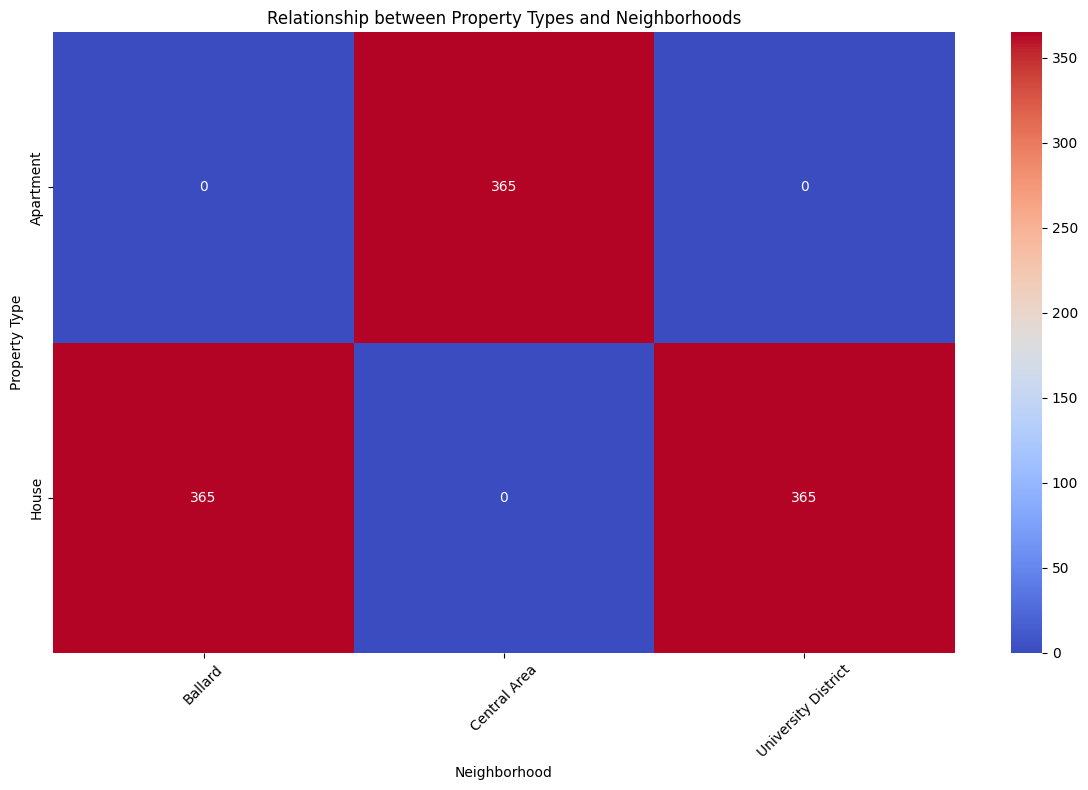

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(property_neighborhood_counts, cmap='coolwarm', annot=True, fmt='d')
plt.title('Relationship between Property Types and Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average review scores by property type:
property_type
Apartment    98.0
House        96.0
Name: review_scores_rating, dtype: float64


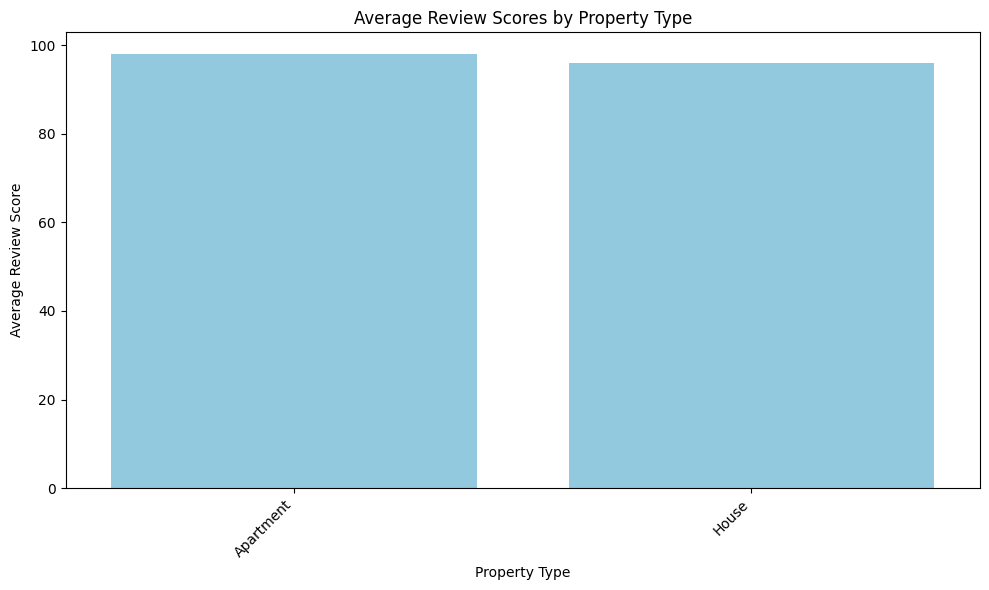

In [ ]:
# 2. Investigate the relationship between listing attributes and average review scores
review_scores_by_property_type = listing_explore_cleaned.groupby('property_type')['review_scores_rating'].mean()
print("\nAverage review scores by property type:")
print(review_scores_by_property_type)

plt.figure(figsize=(10, 6))
sns.barplot(x=review_scores_by_property_type.index, y=review_scores_by_property_type.values, color='skyblue')
plt.title('Average Review Scores by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Correlation between host responsiveness and review scores:
                      host_response_rate  review_scores_rating
host_response_rate                   1.0                   1.0
review_scores_rating                 1.0                   1.0

Correlation between host responsiveness and listing occupancy:


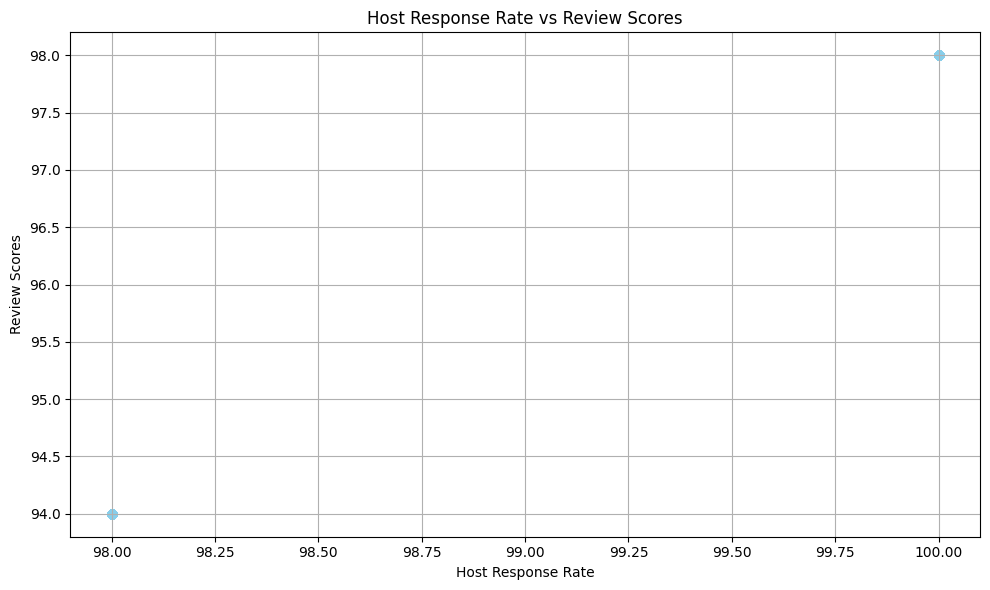

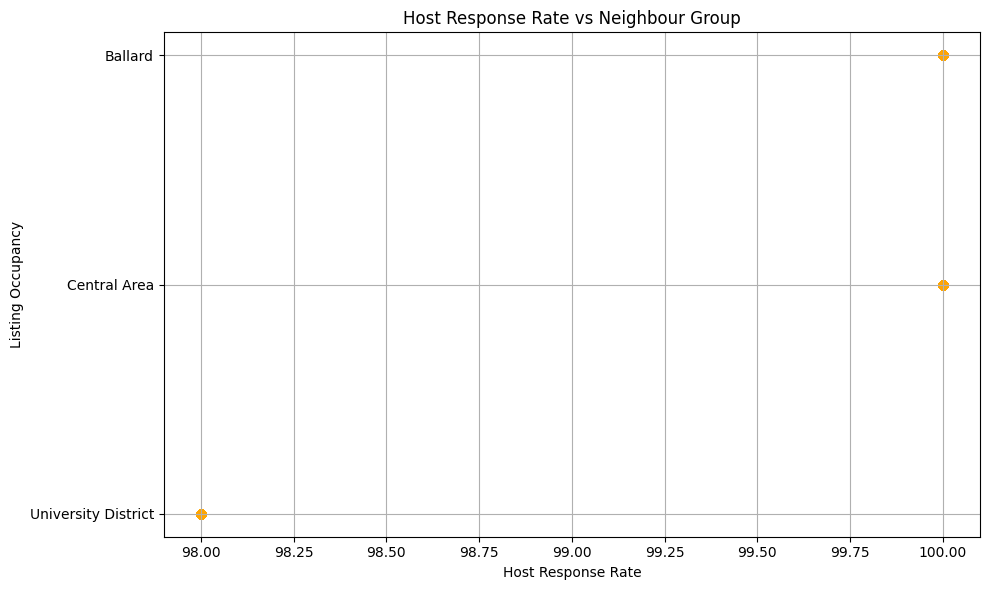

In [ ]:
# 3. Explore the relationship between host responsiveness and listing performance
print("\nCorrelation between host responsiveness and review scores:")
print(listing_explore_cleaned[['host_response_rate', 'review_scores_rating']].corr())

print("\nCorrelation between host responsiveness and listing occupancy:")
# Perform similar analysis for occupancy rates or other listing performance metrics

plt.figure(figsize=(10, 6))
plt.scatter(listing_explore_cleaned['host_response_rate'], listing_explore_cleaned['review_scores_rating'], color='skyblue', alpha=0.5)
plt.title('Host Response Rate vs Review Scores')
plt.xlabel('Host Response Rate')
plt.ylabel('Review Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for host responsiveness neighbor group
plt.figure(figsize=(10, 6))
plt.scatter(listing_explore_cleaned['host_response_rate'], listing_explore_cleaned['neighbourhood_group_cleansed'], color='orange', alpha=0.5)
plt.title('Host Response Rate vs Neighbour Group')
plt.xlabel('Host Response Rate')
plt.ylabel('Listing Occupancy')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-283-e75a0ed20ad8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = listing_explore_cleaned.drop('id', axis=1).corr()


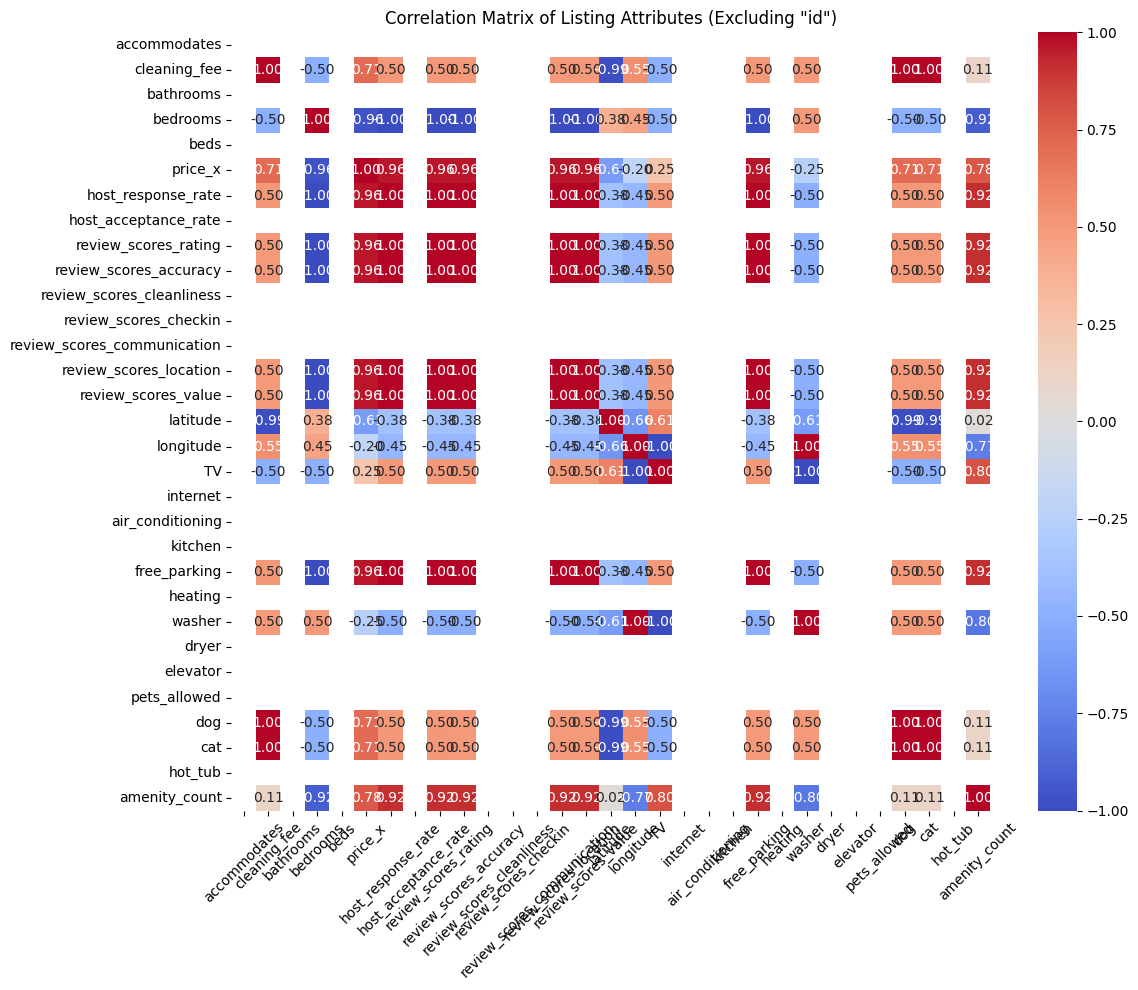

In [ ]:
# Drop the 'id' column and calculate the correlation matrix
correlation_matrix = listing_explore_cleaned.drop('id', axis=1).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Listing Attributes (Excluding "id")')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Q2:

What are the most frequent words used in reviews? Are there any patterns or trends in review sentiment over time? Identify any common themes or topics in the reviews (e.g., cleanliness, location, amenities)? Is there any correlation between review scores and listing characteristics (e.g., price, location, property type)? Explore the relationship between review scores and other factors such as listing price, location, or amenities. Are there any correlations or patterns that could help identify areas for improvement?

In [ ]:
listing_q2 = listing_explore_cleaned.copy()

In [ ]:
listing_q2.columns

Index(['id', 'property_type', 'room_type', 'description',
       'neighbourhood_group_cleansed', 'neighbourhood_cleansed',
       'accommodates', 'cleaning_fee', 'bathrooms', 'neighborhood_overview',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price_x',
       'host_response_rate', 'host_acceptance_rate', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'summary',
       'last_review', 'latitude', 'longitude', 'TV', 'internet',
       'air_conditioning', 'kitchen', 'free_parking', 'heating', 'washer',
       'dryer', 'elevator', 'pets_allowed', 'dog', 'cat', 'hot_tub',
       'amenity_count', 'date_x', 'comments', 'date_y', 'available'],
      dtype='object')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most frequent words in reviews:
[('summary', 1), ('description', 1), ('comments', 1)]


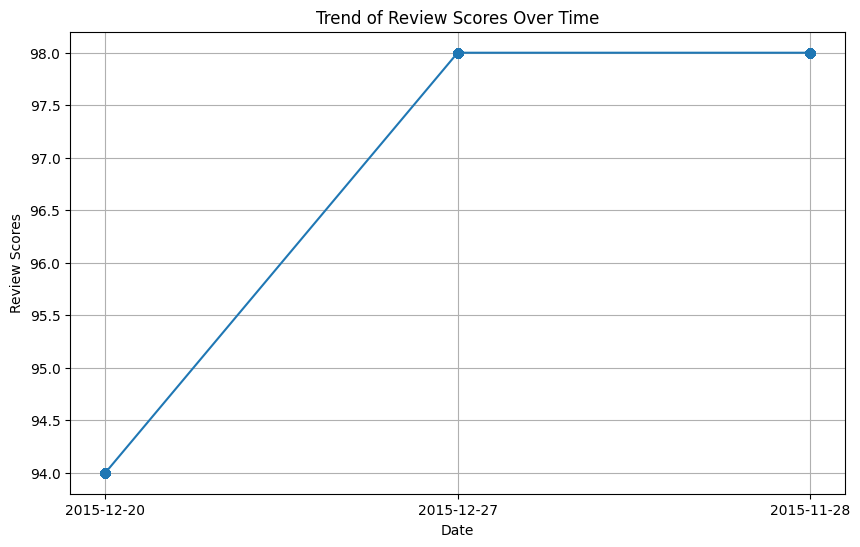


Correlation between review scores and listing characteristics:
                             review_scores_rating   price_x  \
review_scores_rating                     1.000000  0.964579   
price_x                                  0.964579  1.000000   
review_scores_accuracy                   1.000000  0.964579   
review_scores_cleanliness                     NaN       NaN   
review_scores_checkin                         NaN       NaN   
review_scores_communication                   NaN       NaN   
review_scores_location                   1.000000  0.964579   
review_scores_value                      1.000000  0.964579   

                             review_scores_accuracy  \
review_scores_rating                       1.000000   
price_x                                    0.964579   
review_scores_accuracy                     1.000000   
review_scores_cleanliness                       NaN   
review_scores_checkin                           NaN   
review_scores_communication           

In [ ]:
# Tokenize text data and analyze most frequent words in reviews
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

# Concatenate text columns for analysis
text_columns = ['summary', 'description', 'neighborhood_overview', 'comments']
all_text = ' '.join(listing_q2[text_columns].dropna().astype(str))

# Tokenize words and remove stop words
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(all_text)
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Get frequency distribution of words
word_freq = Counter(filtered_tokens)
most_common_words = word_freq.most_common(10)
print("Most frequent words in reviews:")
print(most_common_words)


# Convert 'last_review' column to datetime
listing_q2['last_review'] = pd.to_datetime(listing_q2['last_review'])

# Plot review scores over time
plt.figure(figsize=(10, 6))
plt.plot(listing_explore_cleaned['last_review'], listing_explore_cleaned['review_scores_rating'], marker='o', linestyle='-')
plt.title('Trend of Review Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Review Scores')
plt.grid(True)
plt.show()

# Analyze correlation between review scores and listing characteristics
correlation_matrix = listing_q2[['review_scores_rating', 'price_x', 'review_scores_accuracy', 'review_scores_cleanliness',
                                      'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                                      'review_scores_value']].corr()
print("\nCorrelation between review scores and listing characteristics:")
print(correlation_matrix)


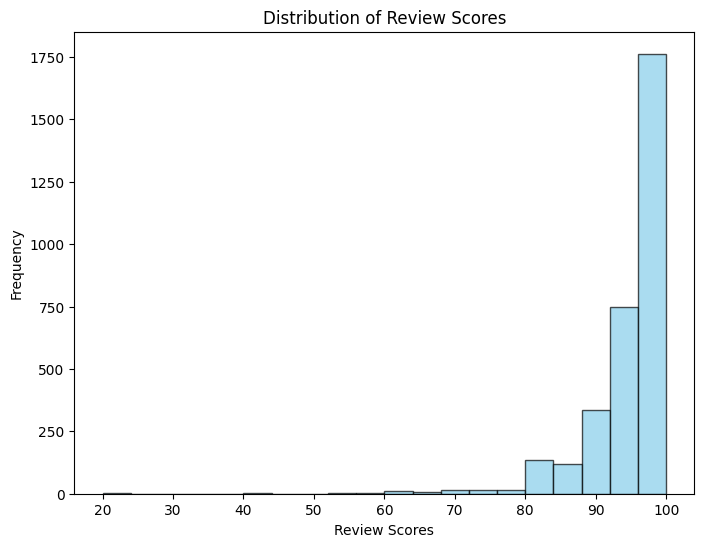

<ipython-input-289-e6b9a97909b7>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


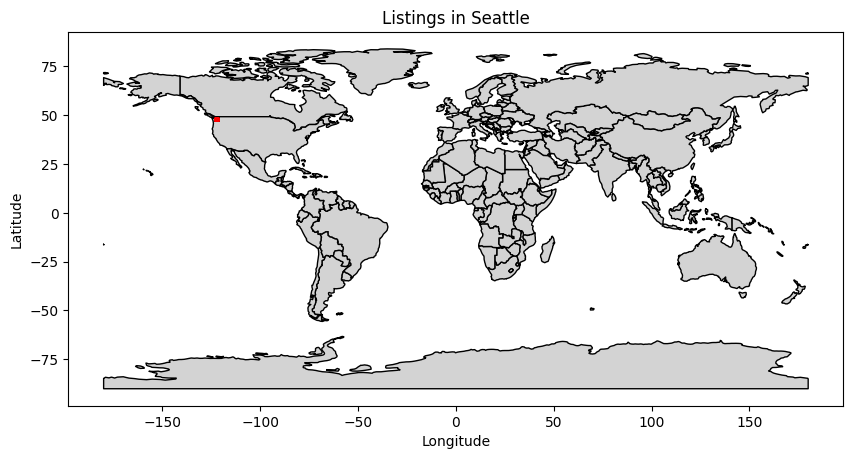

<ipython-input-289-e6b9a97909b7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=amenity, y='review_scores_rating', data=listing_q2, palette='Set2')


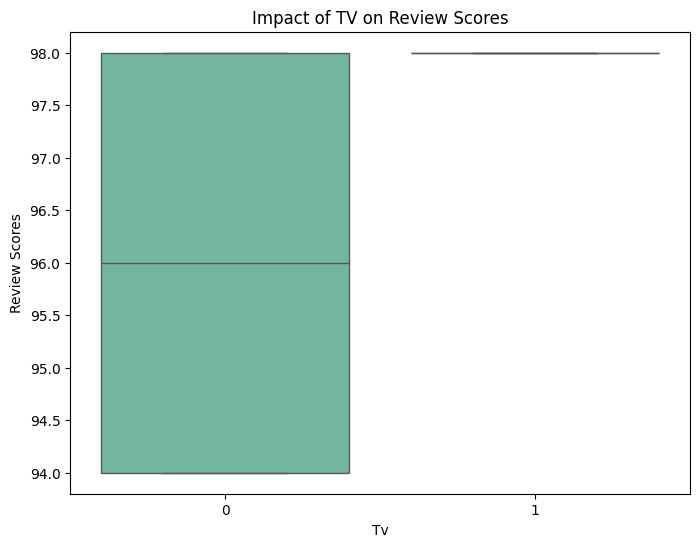

ValueError: Could not interpret value `Internet` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [ ]:
# Distribution of review scores
plt.figure(figsize=(8, 6))
listing_explore['review_scores_rating'].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Geospatial analysis
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame with latitude and longitude
geometry = [Point(xy) for xy in zip(listing_q2['longitude'], listing_q2['latitude'])]
gdf = gpd.GeoDataFrame(listing_q2, geometry=geometry)

# Plot listings on map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Listings in Seattle')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Impact of amenities on review scores
amenities = ['TV', 'Internet', 'kitchen', 'free_parking', 'air_conditioning']
for amenity in amenities:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=amenity, y='review_scores_rating', data=listing_q2, palette='Set2')
    plt.title(f'Impact of {amenity} on Review Scores')
    plt.xlabel(amenity.capitalize())
    plt.ylabel('Review Scores')
    plt.show()

# Seasonal trends
listing_explore['month'] = listing_explore['last_review'].dt.month
monthly_avg_review_scores = listing_explore.groupby('month')['review_scores_rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_review_scores.index, monthly_avg_review_scores.values, marker='o', linestyle='-', color='orange')
plt.title('Seasonal Trends in Review Scores')
plt.xlabel('Month')
plt.ylabel('Average Review Scores')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Impact of listing characteristics on occupancy rates (e.g., using scatter plots or regression analysis)
# For example, let's analyze the impact of price on occupancy rates
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='availability_365', data=listing_explore)
plt.title('Impact of Price on Occupancy Rates')
plt.xlabel('Price')
plt.ylabel('Availability (in days)')
plt.show()


#### How does the price of listings vary based on factors like location, property type, and number of bedrooms/bathrooms? Are there any seasonal trends in pricing? Can you identify any outliers or anomalies in pricing?



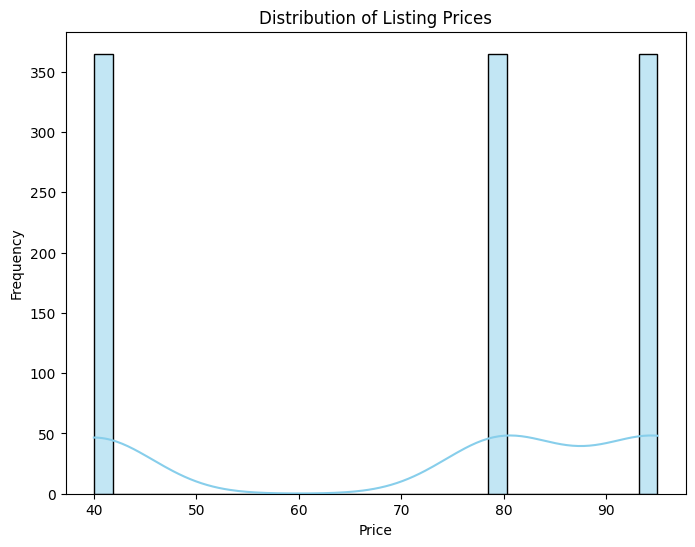

<ipython-input-292-e9118459c4ac>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group_cleansed', y='price_x', data=listing_q2, palette='Set3')


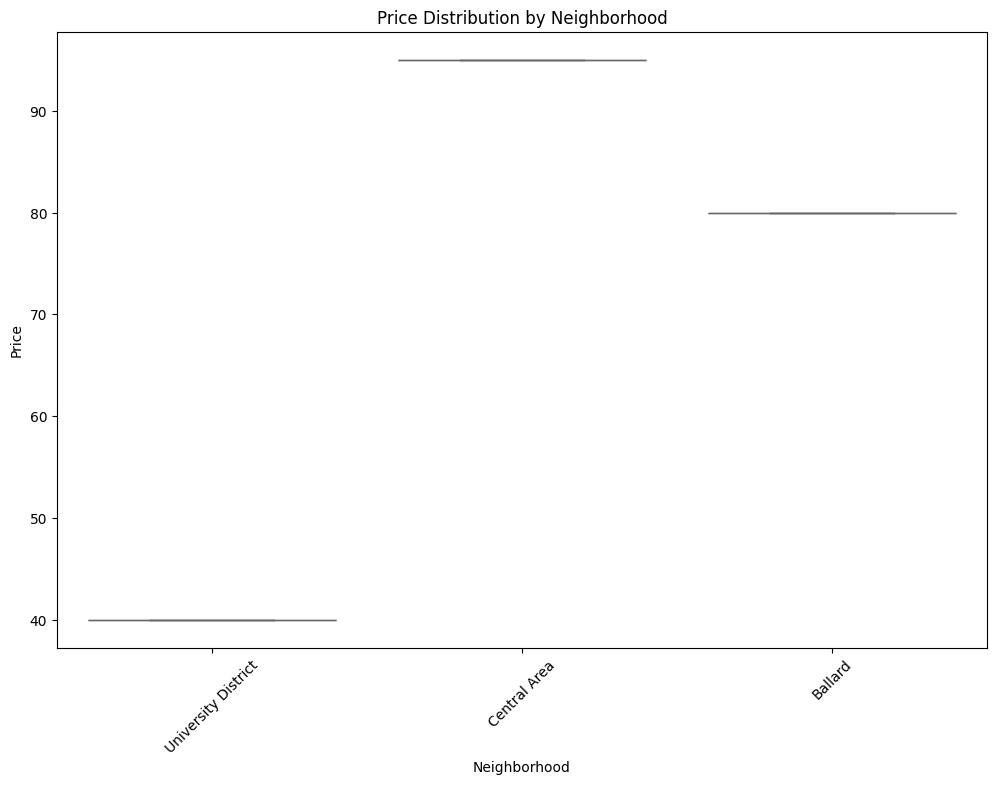

<ipython-input-292-e9118459c4ac>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type', y='price_x', data=listing_q2, palette='Set2')


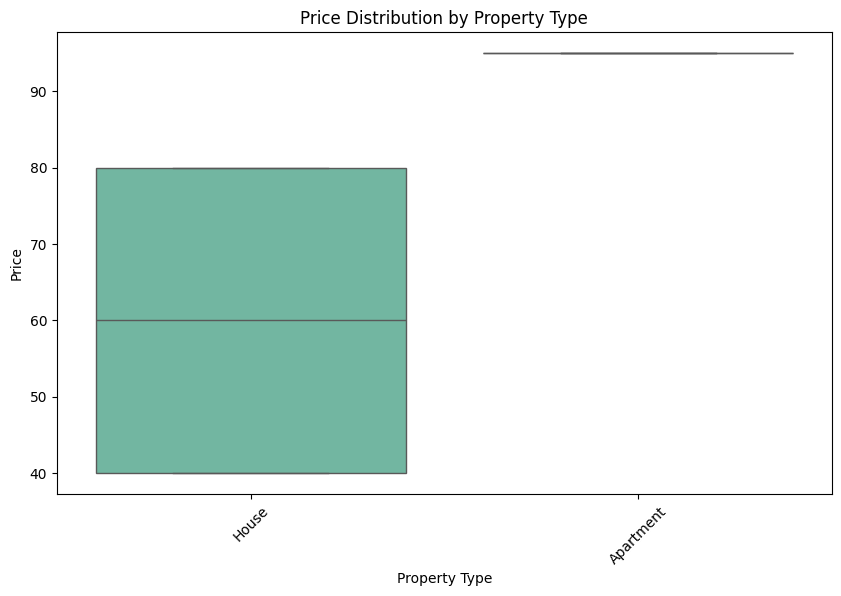

<ipython-input-292-e9118459c4ac>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price_x', data=listing_q2, palette='Set1')


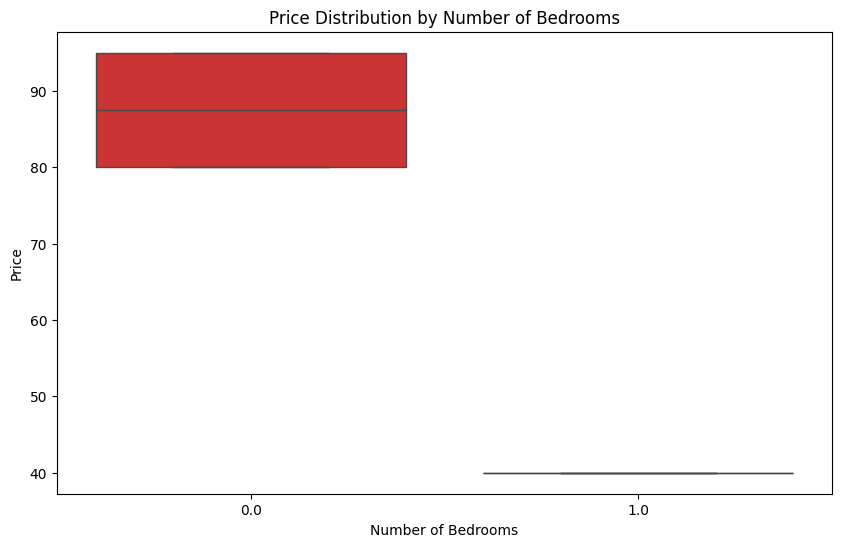

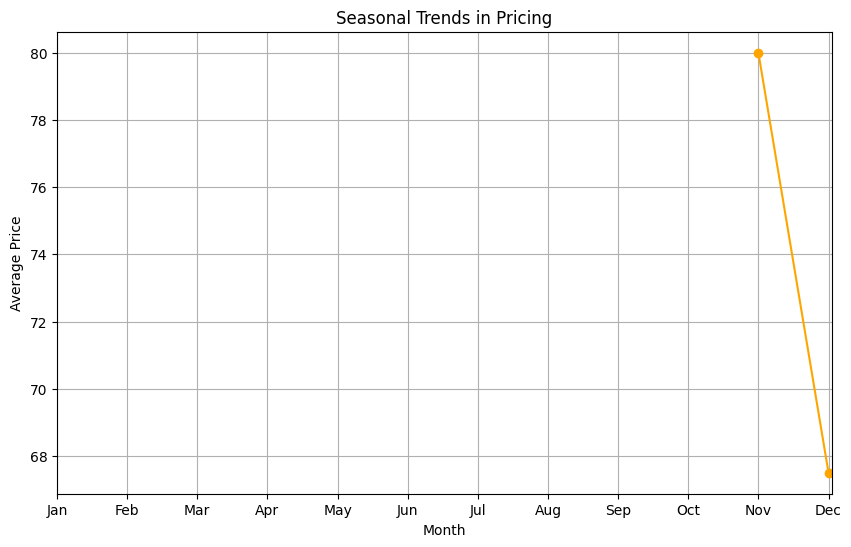

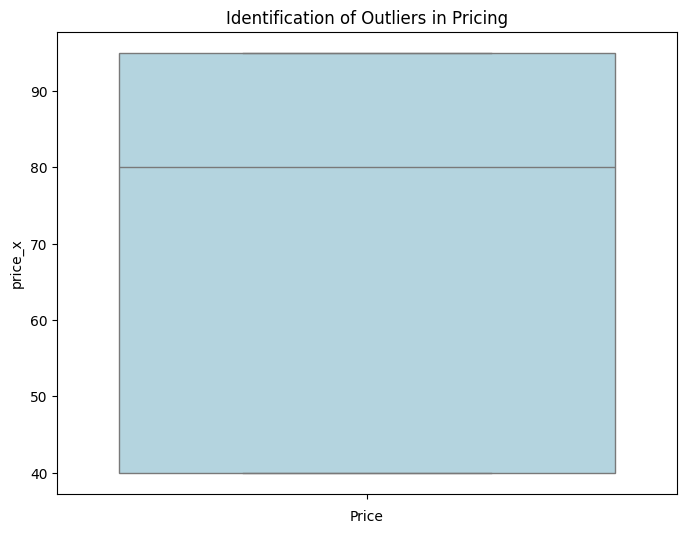

In [ ]:

# Price distribution
plt.figure(figsize=(8, 6))
sns.histplot(listing_q2['price_x'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Price by location
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group_cleansed', y='price_x', data=listing_q2, palette='Set3')
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Price by property type
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='price_x', data=listing_q2, palette='Set2')
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Price by number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price_x', data=listing_q2, palette='Set1')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Seasonal trends in pricing
listing_q2['month'] = listing_q2['last_review'].dt.month
monthly_avg_price = listing_q2.groupby('month')['price_x'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', linestyle='-', color='orange')
plt.title('Seasonal Trends in Pricing')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Identification of outliers
plt.figure(figsize=(8, 6))
sns.boxplot(listing_q2['price_x'], color='lightblue')
plt.title('Identification of Outliers in Pricing')
plt.xlabel('Price')
plt.show()


#### Are there any patterns in host behavior (e.g., response rate, acceptance rate) that correlate with listing performance?



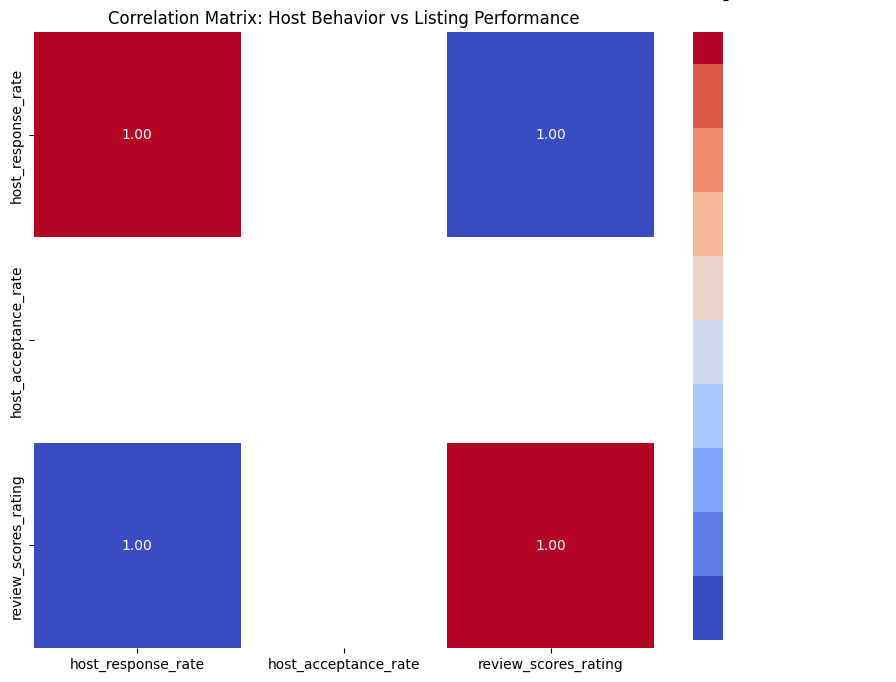

In [ ]:
# Correlation Analysis
correlation_matrix = listing_q2[['host_response_rate', 'host_acceptance_rate',
                                   'review_scores_rating']].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Host Behavior vs Listing Performance')
plt.show()


#### Predict the price of a listing based on its attributes (e.g., location, property type, number of bedrooms)?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Select relevant features
features = ['property_type', 'room_type', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed','accommodates', 'cleaning_fee', 'bathrooms',
            'bedrooms', 'beds', 'bed_type', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating','review_scores_location', 'review_scores_value',
            'TV', 'internet','air_conditioning', 'kitchen', 'free_parking', 'heating', 'washer','dryer', 'elevator', 'pets_allowed', 'dog', 'cat', 'hot_tub','amenity_count']


# Split the data into training and testing sets
X = listing_q2[features]
y = listing_q2['price_x']

X_encoded = pd.get_dummies(X, columns=['property_type', 'room_type', 'bed_type', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.068714281712632e-28


In [ ]:
X_encoded


,accommodates,cleaning_fee,bathrooms,bedrooms,beds,host_response_rate,host_acceptance_rate,review_scores_rating,review_scores_location,review_scores_value,...,room_type_Entire home/apt,room_type_Private room,bed_type_Pull-out Sofa,bed_type_Real Bed,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_University District,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Minor,neighbourhood_cleansed_University District
365,2,10.0,1.0,1.0,1.0,98.0,100.0,94.0,9.0,9.0,...,0,1,0,1,0,0,1,0,0,1
366,2,10.0,1.0,1.0,1.0,98.0,100.0,94.0,9.0,9.0,...,0,1,0,1,0,0,1,0,0,1
367,2,10.0,1.0,1.0,1.0,98.0,100.0,94.0,9.0,9.0,...,0,1,0,1,0,0,1,0,0,1
368,2,10.0,1.0,1.0,1.0,98.0,100.0,94.0,9.0,9.0,...,0,1,0,1,0,0,1,0,0,1
369,2,10.0,1.0,1.0,1.0,98.0,100.0,94.0,9.0,9.0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2,10.0,1.0,0.0,1.0,100.0,100.0,98.0,10.0,10.0,...,1,0,1,0,1,0,0,1,0,0
2916,2,10.0,1.0,0.0,1.0,100.0,100.0,98.0,10.0,10.0,...,1,0,1,0,1,0,0,1,0,0
2917,2,10.0,1.0,0.0,1.0,100.0,100.0,98.0,10.0,10.0,...,1,0,1,0,1,0,0,1,0,0
2918,2,10.0,1.0,0.0,1.0,100.0,100.0,98.0,10.0,10.0,...,1,0,1,0,1,0,0,1,0,0


### Communicate the results